In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mne as mne
sns.set_palette('pastel')

eeg = np.loadtxt('/Users/rodrigo/Post-Grad/Disciplines/Neural Signaling Processing/Aula_3/restEEG/OlhosAbertos.txt')
canais = pd.read_csv('/Users/rodrigo/Post-Grad/Disciplines/Neural Signaling Processing/Aula_3/restEEG/NOMEScanais.txt', dtype='str', header=None)

# Suponha que o sinal foi adquirido sob uma taxa de amostragem de 250Hz: 
Hz = 250

eeg = pd.DataFrame(eeg, columns=canais.iloc[:,0].values)
eeg['Time(s)'] = np.arange(0, (1/Hz)*len(eeg), 1/Hz)

In [6]:
# make 1020
mne_info = mne.create_info(
                    list(eeg.columns[:-1]),
                    Hz,
                    ch_types=['eeg']*len(eeg.columns[:-1])
)

In [7]:
mne_raw = mne.io.RawArray(eeg.iloc[:,:-1].values.T, mne_info)

standard_1020 = mne.channels.make_standard_montage('standard_1020')
mne_raw.set_montage(standard_1020)

Creating RawArray with float64 data, n_channels=32, n_times=45465
    Range : 0 ... 45464 =      0.000 ...   181.856 secs
Ready.


<RawArray | 32 x 45465 (181.9 s), ~11.1 MB, data loaded>

In [8]:
# Set filter parameters
lowCut = 4 # Hz
highCut = 120 # Hz
freqNotch = 60 # Hz (eletric interference from the enviroment)

# Apply bandpass and notch filter
mne_raw.filter(lowCut, highCut, fir_design='firwin')
mne_raw.notch_filter(freqNotch, fir_design='firwin')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 122.50 Hz)
- Filter length: 413 samples (1.652 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished


<RawArray | 32 x 45465 (181.9 s), ~11.1 MB, data loaded>

In [11]:
#%matplotlib ipympl
mne_raw.plot(scalings='auto')

Using pyopengl with version 3.1.6


Channels marked as bad:
none


In [11]:
ica_obj = mne.preprocessing.ICA(
                    n_components=0.99,
                    method='infomax',
                    max_iter="auto",
                    random_state=1,
                    fit_params=dict(extended=True)).fit(mne_raw)

ica = ica_obj.get_sources(mne_raw).get_data()
print(ica.shape)

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by explained variance: 25 components
Computing Extended Infomax ICA
Fitting ICA took 8.9s.
(25, 45465)


In [12]:
ica_obj.plot_sources(mne_raw);

Creating RawArray with float64 data, n_channels=25, n_times=45465
    Range : 0 ... 45464 =      0.000 ...   181.856 secs
Ready.
Using pyopengl with version 3.1.6


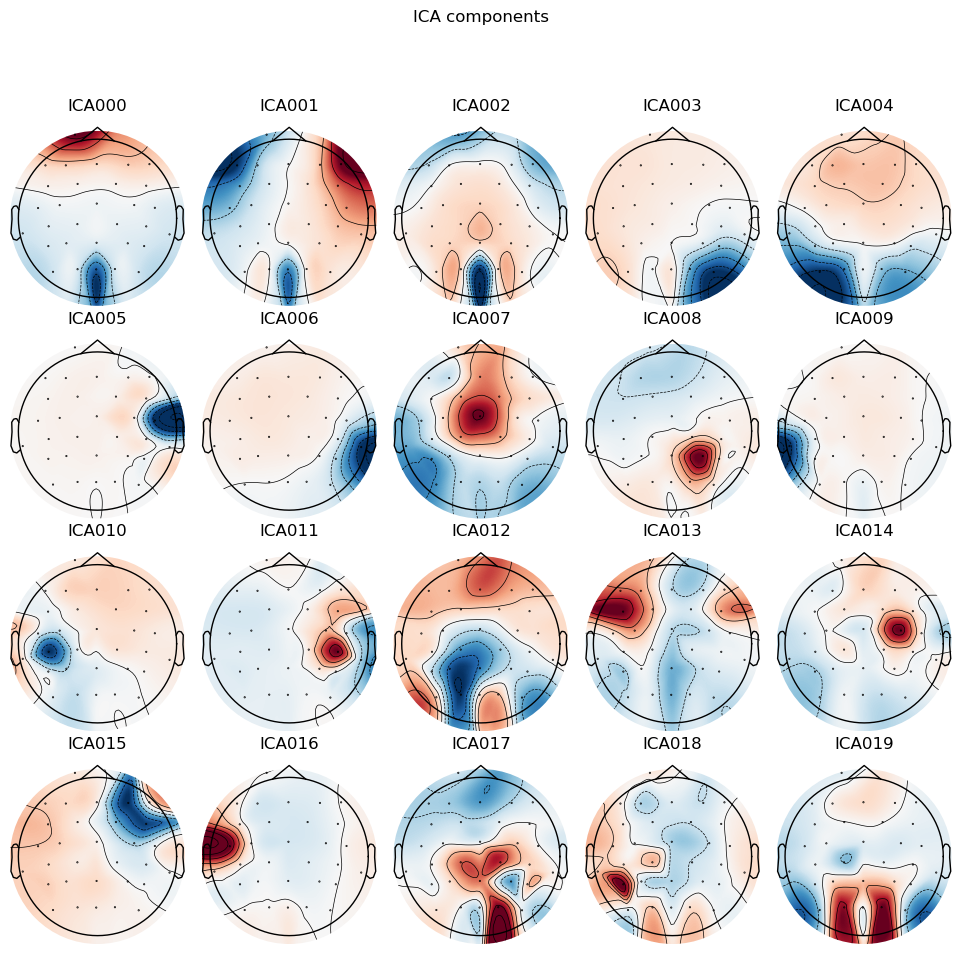

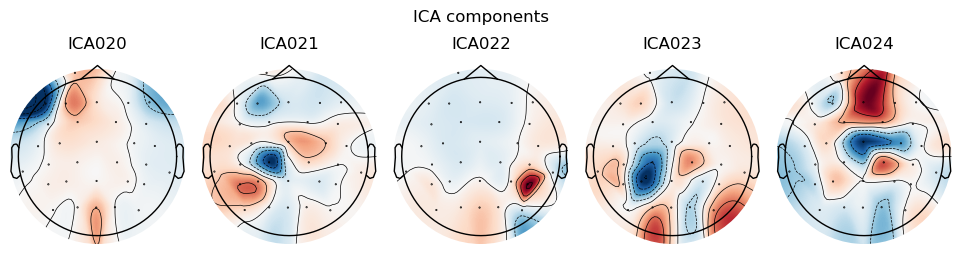

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x260.5 with 5 Axes>]

In [13]:
ica_obj.plot_components(picks=None,show=True, inst=mne_raw)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated


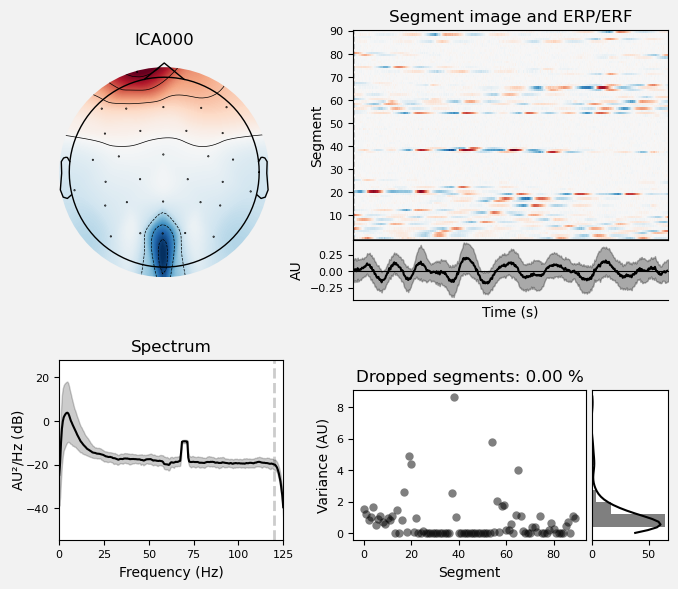

[<Figure size 700x600 with 6 Axes>]

In [14]:
ica_obj.plot_properties(mne_raw, picks=[0], show=True)

In [15]:
from mne_icalabel import label_components

ic_labels = label_components(mne_raw, ica_obj, method="iclabel")
labels = ic_labels["labels"]

/var/folders/24/hz8c6rbx3r32smymhrvkwbmc0000gn/T/ipykernel_6112/1237217321.py:3: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(mne_raw, ica_obj, method="iclabel")
/var/folders/24/hz8c6rbx3r32smymhrvkwbmc0000gn/T/ipykernel_6112/1237217321.py:3: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(mne_raw, ica_obj, method="iclabel")


In [16]:
labels

['eye blink',
 'other',
 'other',
 'brain',
 'brain',
 'muscle artifact',
 'other',
 'brain',
 'brain',
 'heart beat',
 'brain',
 'brain',
 'brain',
 'other',
 'brain',
 'brain',
 'other',
 'brain',
 'other',
 'brain',
 'other',
 'brain',
 'brain',
 'other',
 'other']